In [1]:
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_reits()], 120)
f'from {quote.start.date()} to {quote.end.date()}'

'from 2019-02-20 to 2019-06-20'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 5) & (stat['21-mean'] > 1)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
symbol,,,,,
AMH,64,3.502907,1.601826,2.082773,4.649123
BXMT,64,2.217364,1.124843,1.823097,2.677339
INVH,64,4.429997,2.666122,1.599075,3.809142
EQIX,64,4.975136,3.055818,1.573546,4.324718
WPC,64,4.254013,2.826191,1.446239,4.296334
BRG,64,3.782431,2.728998,1.324942,4.035088
PMT,64,2.310457,1.783291,1.202154,4.901512
PSA,64,4.451048,3.685018,1.162649,4.410453
AMT,64,4.985417,4.280970,1.125621,4.096787


In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['VNQ'], cr=3, dr=2)

['VNQ', 'AMH'] 2.10729042069258 0.5022735341096838 1.7248274006989768 -2.8491849830344247
['VNQ', 'BXMT'] 0.5140674999599133 0.14754492163101895 1.3304706836237592 -2.589508632180662


['VNQ', 'BXMT']

In [7]:
quote.setup_mask(['BXMT', 'VNQ'])
quote.find_optimal_ratio(21, 2)

     fun: 1.0860632061618976
     jac: array([2.17223413, 2.17167783])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.80640725, 0.19359275])


({'BXMT': 0.806407247298591, 'VNQ': 0.19359275270140897}, 2.1242, 1.0421)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,2.122159,1.041856,-0.696555,1.650288,2.358637,2.736578,4.079408,1.876931,2.424268
BXMT,64.0,2.217364,1.124843,-0.871521,1.709116,2.252804,3.108012,4.386002,1.823097,2.677339
VNQ,64.0,1.736077,2.047738,-2.311020,0.084891,2.065982,3.124952,5.600953,0.766412,3.975014


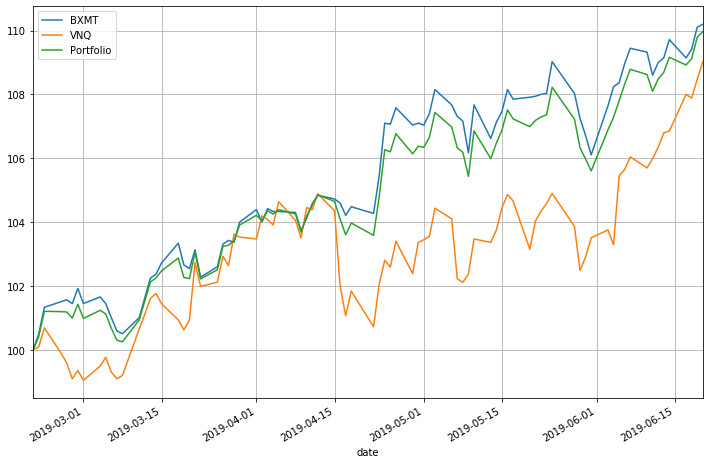

In [8]:
%pylab inline
quote.graph(21, {'BXMT': 0.80640725, 'VNQ': 0.19359275})